# AlloCiné Analysis

We had web scraped (see [the script here](https://github.com/Bastien-LDC/Allocine-project/blob/master/Webscraping_From_AlloCine.ipynb)) the data from the AlloCiné website. AlloCiné is a company which provides information on French cinema and provide ratings from the press and from their users for a large number of movies.

**Data description :**

- `id` : Allocine movie id
- `title` : the movie's title (in french)
- `release_date`: the original release date
- `duration`: the movies length
- `genres` : the movies types (as an array, up to three different types)
- `directors` : movies directors (as an array)
- `actors` : main characters of the movies (as an array)
- `nationality`: nationality of the movies (as an array)
- `press_rating`: press ratings (from 0 to 5 stars)
- `nb_press_rating`: number of press votes
- `user_rating`:  AlloCiné users ratings (from 0 to 5 stars)
- `nb_user_rating`: number of users votes
- `summary`: short summary of the movie in french

If you are interested in, the data is available on one csv (brut and clean version) [allocine_dataset.zip](http://olivier-maillot.fr/wp-content/uploads/2017/08/allocine_dataset.zip) or in multiple csv files (clean version only) [allocine_rel-dataset.zip](http://olivier-maillot.fr/wp-content/uploads/2017/08/allocine_rel-dataset.zip).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the csv
allocine = pd.read_csv("allocine_movies.csv", index_col=0)
cols = allocine.columns

FileNotFoundError: [Errno 2] No such file or directory: 'allocine_movies.csv'

In [ ]:
# Rename (nb_)spec_rating to (nb_)user_rating
allocine.rename(columns={'spec_rating':'user_rating', 'nb_spec_rating':'nb_user_rating'}, inplace=True)

In [ ]:
allocine.head()

,id,title,release_date,duration,genres,directors,actors,nationality,press_rating,nb_press_rating,user_rating,nb_user_rating,summary
0,211012,The Batman,2022-03-02,177,"Action, Policier, Thriller","Matt Reeves, Peter Craig","Robert Pattinson, Zoë Kravitz, Paul Dano",américain,3.9,37.0,4.2,9807.0,Deux années à arpenter les rues en tant que Ba...
1,281976,Goliath,2022-03-09,122,Thriller,"Frédéric Tellier, Simon Moutaïrou","Gilles Lellouche, Pierre Niney, Emmanuelle Bercot",français,3.6,29.0,4.0,2861.0,"France, professeure de sport le jour, ouvrière..."
2,42303,Permis de construire,2022-03-09,93,Comédie,"Eric Fraticelli, Didier Bourdon","Didier Bourdon, Eric Fraticelli, Anne Consigny",français,1.8,4.0,3.1,665.0,"Dentiste à Paris, Romain vient de perdre son p..."
3,287738,En corps,2022-03-30,120,"Comédie dramatique, Drame, Comédie","Cédric Klapisch, Santiago Amigorena","Marion Barbeau, Hofesh Shechter, Denis Podalydès",français,3.4,32.0,4.2,1301.0,"Elise, 26 ans est une grande danseuse classiqu..."
4,284864,Notre-Dame brûle,2022-03-16,110,Drame,"Jean-Jacques Annaud, Thomas Bidegain","Samuel Labarthe, Jean-Paul Bordes, Mikaël Chir...",français,3.5,32.0,4.0,1732.0,"Le long métrage de Jean-Jacques Annaud, recons..."


In [ ]:
allocine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               30 non-null     int64  
 1   title            30 non-null     object 
 2   release_date     30 non-null     object 
 3   duration         30 non-null     int64  
 4   genres           30 non-null     object 
 5   directors        30 non-null     object 
 6   actors           29 non-null     object 
 7   nationality      30 non-null     object 
 8   press_rating     28 non-null     float64
 9   nb_press_rating  28 non-null     float64
 10  user_rating      28 non-null     float64
 11  nb_user_rating   28 non-null     float64
 12  summary          30 non-null     object 
dtypes: float64(4), int64(2), object(7)
memory usage: 3.3+ KB


In [ ]:
# Convert the strings to arrays
allocine["genres"] = allocine["genres"].apply(lambda x: x.split(","))
allocine["directors"] = allocine["directors"].apply(lambda x: x.split(","))
allocine["actors"] = allocine["actors"].apply(lambda x: x.split(",") if type(x) != float else [])
allocine["nationality"] = allocine["nationality"].apply(lambda x: x.split(","))

In [ ]:
# drop NaN values for movies that haven't been rated yet
allocine = allocine.dropna(subset=["press_rating", "user_rating"]).reset_index(drop=True)

In [ ]:
# Convert nb_spec_rating and nb_press_rating to int
allocine[["nb_press_rating","nb_user_rating"]] = allocine[["nb_press_rating","nb_user_rating"]].astype(int)

In [ ]:
allocine.shape

(28, 13)

# Section 1. Ratings Distributions

## Plot the Distribution

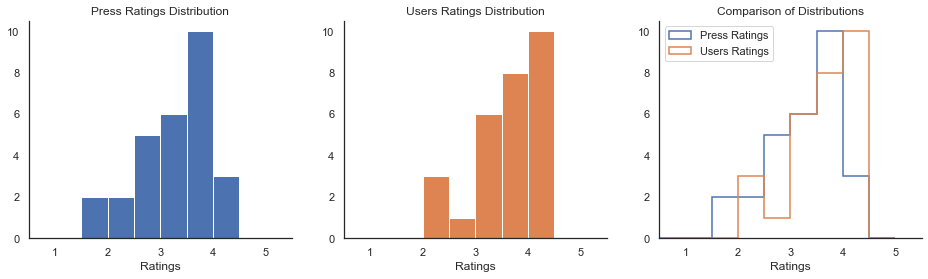

In [ ]:
sns.set(style="white", palette="deep")

fig, axes = plt.subplots(1, 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.set_xlim([0.5,5.5])
ax2.set_xlim([0.5,5.5])
ax3.set_xlim([0.5,5.5])


ax1.hist(allocine["press_rating"], bins = 10, range = (0,5), color='C0') # bin range = 1
ax1.set_title('Press Ratings Distribution')
ax1.set_xlabel('Ratings')

ax2.hist(allocine["user_rating"], bins = 10, range = (0,5), color='C1') # bin range = 1
ax2.set_title('Users Ratings Distribution')
ax2.set_xlabel('Ratings')

ax3.hist(allocine["press_rating"], bins = 10, range = (0,5), histtype = 'step', 
         lw=1.5, label='Press Ratings', color='C0')
ax3.hist(allocine["user_rating"], bins = 10, range = (0,5), histtype = 'step', 
         lw=1.5, label='Users Ratings', color='C1')
ax3.legend(loc = 'upper left')
ax3.set_title('Comparison of Distributions')
ax3.set_xlabel('Ratings')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [ ]:
# save the fig
fig.savefig('allocine-0_hist.png', bbox_inches='tight', dpi=200)

## Descriptive Statistics

In [ ]:
# descriptive statistics
desc_ratings = allocine[["user_rating","press_rating"]].describe().T

In [ ]:
# compute the skewness
from scipy.stats import skew
from scipy.stats import skewtest
desc_ratings.loc["press_rating", "skew"] = skew(allocine[["press_rating"]])
v, p = skewtest(allocine[["press_rating"]])
desc_ratings.loc["press_rating", "skewtest"] = (p < 0.05)
desc_ratings.loc["user_rating", "skew"] = skew(allocine[["user_rating"]])
v, p = skewtest(allocine[["user_rating"]])
desc_ratings.loc["user_rating", "skewtest"] = (p < 0.05)

In [ ]:
# compute the kurtosis
from scipy.stats import kurtosis
from scipy.stats import kurtosistest
desc_ratings.loc["press_rating", "kurtosis"] = kurtosis(allocine[["press_rating"]], fisher=False)
v, p = kurtosistest(allocine[["press_rating"]])
desc_ratings.loc["press_rating", "kurtosistest"] = (p < 0.05)
desc_ratings.loc["user_rating", "kurtosis"] = kurtosis(allocine[["user_rating"]], fisher=False)
v, p = kurtosistest(allocine[["user_rating"]])
desc_ratings.loc["user_rating", "kurtosistest"] = (p < 0.05)

In [ ]:
# print the stats
desc_ratings

,count,mean,std,min,25%,50%,75%,max,skew,skewtest,kurtosis,kurtosistest
user_rating,28.0,3.539286,0.595252,2.3,3.100,3.75,4.000,4.2,-0.833008,True,2.656551,False
press_rating,28.0,3.239286,0.674586,1.8,2.825,3.35,3.825,4.1,-0.635299,[False],2.426215,[False]


## Ratings Correlation

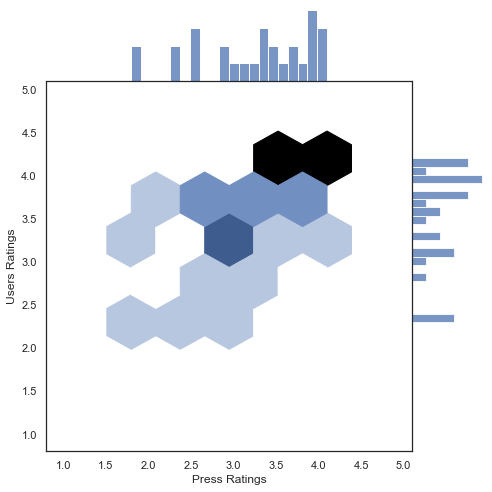

In [ ]:
ax = sns.jointplot(x="press_rating", y="user_rating", 
                   data=allocine, kind="hex",
                   marginal_kws=dict(bins=20),
                   xlim=(0.8,5.1), ylim=(0.8,5.1),
                   height=7, space=0).set_axis_labels("Press Ratings", "Users Ratings")

In [ ]:
# save the fig
ax.savefig('allocine-1_jointplot.png', bbox_inches='tight', dpi=200)

# Section 2. Five Stars Movies Analysis

The press seems to give much more hightest ratings than AlloCiné users. We need to dig a little bit more to see what happening here. In this section we use a subset of the data where press ratings are five stars. 

## Compare to users ratings

In [ ]:
five_stars = allocine[allocine["press_rating"] >= 5]

In [ ]:
f, ax = plt.subplots(figsize=(15,6))
f.suptitle('Movies with Five Stars From The Press', 
           fontsize=13)
f.subplots_adjust(top=0.85)

sns.countplot(five_stars["user_rating"], ax=ax)
ax.set_xlabel("Users Ratings")
ax.set_ylabel("")
sns.despine(top=True, right=True, left=False, bottom=False)

In [ ]:
# save the fig
f.savefig('allocine-2_hist5stars.png', bbox_inches='tight', dpi=200)

In [ ]:
# print the first tier and second tier of the Users Ratings
allocine[["user_rating"]].quantile([.33,.66])

,user_rating
0.33,3.300
0.66,3.964


In [ ]:
p = (len(five_stars[(five_stars["user_rating"] < 2.9)]) / len(five_stars)) * 100
print('{} % of the movies with the highest press ratings received a low users ratings.'.format(round(p, 2)))

In [ ]:
p = (len(five_stars[(five_stars["user_rating"] < 3.4) & (five_stars["user_rating"] >= 2.9)]) / len(five_stars)) * 100
print('{} % of the movies with the highest press ratings received a moderate users ratings.'.format(round(p, 2)))

10.91 % of the movies with the highest press ratings received a moderate users ratings.


In [ ]:
p = (len(five_stars[five_stars["user_rating"] >= 3.4]) / len(five_stars)) * 100
print('{} % of the movies with the highest press ratings received a high users ratings.'.format(round(p, 2)))

88.73 % of the movies with the highest press ratings received a high users ratings.


## Distribution Analysis of Five Stars Movies

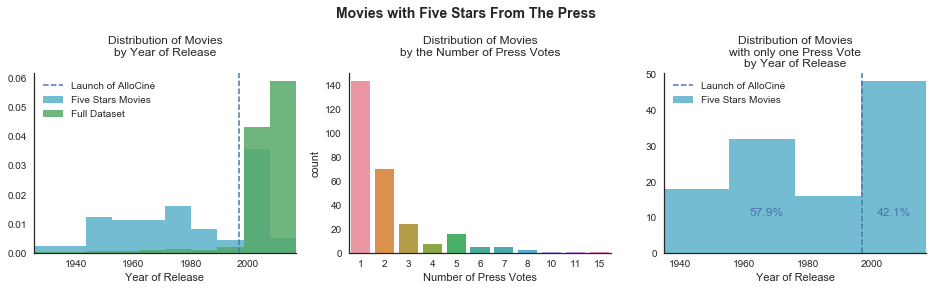

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (16,4))
fig.suptitle('Movies with Five Stars From The Press', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.75)
ax1, ax2, ax3 = fig.axes

# fig 1
ax1.set_xlim([1925,2017])
ax1.set_title("Distribution of Movies\nby Year of Release\n")
# years distribution of the five stars
sns.distplot(five_stars["release_date"].dt.year.dropna(), ax=ax1, 
             axlabel="Year of Release", label="Five Stars Movies", bins=10, 
             norm_hist=True, kde=False,
             hist_kws={"alpha": 0.9, "color": "C5"})

# years distribution of all the data
sns.distplot(allocine["release_date"].dt.year.dropna(), ax=ax1, 
             axlabel="Year of Release", label="Full Dataset", bins=10, 
             norm_hist=True, kde=False,
             hist_kws={"alpha": 0.85, "color": "C1"})

ax1.axvline(x=1997, color="C0", label="Launch of AlloCiné", linestyle="--", linewidth=1.5)
ax1.legend(loc = "upper left")

# fig 2
sns.countplot(five_stars["nber_press_vote"], ax=ax2)
ax2.set_xlabel("Number of Press Votes")
ax2.set_title("Distribution of Movies\nby the Number of Press Votes\n")
sns.despine(top=True, right=True, left=False, bottom=False)

# fig 3
# years distribution of all the data
ax3.set_xlim([1935,2017])
ax3.set_title("Distribution of Movies\nwith only one Press Vote\nby Year of Release")
# years distribution of the view
fs_nbp = five_stars[five_stars["nber_press_vote"] == 1]
left97 = len(fs_nbp[fs_nbp["release_date"].dt.year < 1997])
right97 = len(fs_nbp[fs_nbp["release_date"].dt.year >= 1997])
sns.distplot(fs_nbp["release_date"].dt.year.dropna(), ax=ax3, 
             axlabel="Year of Release", label="Five Stars Movies", bins=4, 
             norm_hist=False, kde=False,
             hist_kws={"alpha": 0.9, "color": "C5"})

ax3.text(1967, 10, '{}%'.format(round((left97 / (left97 + right97)) * 100, 1)), ha='center', va='bottom', color='C0')
ax3.text(2007, 10, '{}%'.format(round((right97 / (left97 + right97)) * 100, 1)), ha='center', va='bottom', color='C0')
ax3.axvline(x=1997, color="C0", label="Launch of AlloCiné", linestyle="--", linewidth=1.5)
ax3.legend(loc = "upper left");

In [ ]:
# save the fig
fig.savefig('allocine-3_5StarsByYear.png', bbox_inches='tight', dpi=200)

# Section 3. General Ratings Comparaison
## Rating Difference

In [ ]:
allocine["diff_rating"] = (allocine["press_rating"] - allocine["user_rating"]).abs()

### Descriptive Statistics

In [ ]:
# Descriptive statistics
allocine[["diff_rating"]].describe().T

,count,mean,std,min,25%,50%,75%,max
diff_rating,10424.0,0.553972,0.429605,0.0,0.2,0.5,0.8,2.9


### Ploting the Distribution

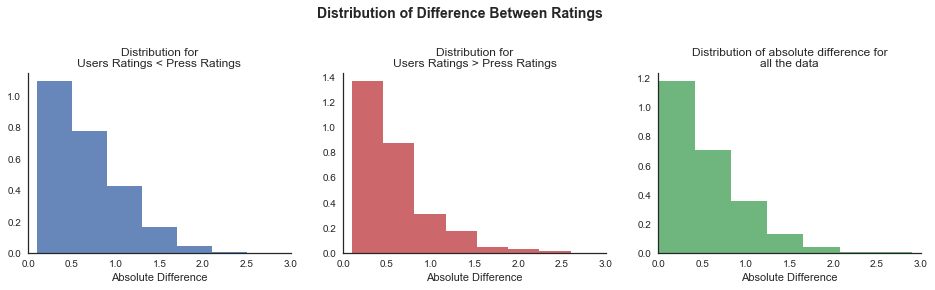

In [ ]:
f, ax = plt.subplots(1, 3, figsize = (16,4))
f.suptitle('Distribution of Difference Between Ratings', 
           fontsize=14, fontweight='bold')
f.subplots_adjust(top=0.75)
ax1, ax2, ax3 = f.axes

ax1.set_xlim([0,3])
ax1.set_title("Distribution for\nUsers Ratings < Press Ratings")
sns.distplot(allocine.loc[allocine["user_rating"] < allocine["press_rating"], "diff_rating"], ax=ax1, bins=7, 
             norm_hist=True, kde=False,
             hist_kws={"alpha": 0.85, "color": "C0"})

ax1.set_xlabel("Absolute Difference")

ax2.set_xlim([0,3])
ax2.set_title("Distribution for\nUsers Ratings > Press Ratings")
sns.distplot(allocine.loc[allocine["user_rating"] > allocine["press_rating"], "diff_rating"], ax=ax2, bins=7, 
             norm_hist=True, kde=False,
             hist_kws={"alpha": 0.85, "color": "C2"})
ax2.set_xlabel("Absolute Difference")

ax3.set_xlim([0,3])
ax3.set_title("Distribution of absolute difference for\nall the data")
sns.distplot(allocine.loc[:, "diff_rating"], ax=ax3, bins=7, 
             norm_hist=True, kde=False,
             hist_kws={"alpha": 0.85, "color": "C1"})
ax3.set_xlabel("Absolute Difference")

sns.despine(top=True, right=True, left=False, bottom=False)

In [ ]:
# save the fig
f.savefig('allocine-4_abs-diff-rating.png', bbox_inches='tight', dpi=200)

In [ ]:
x = round((len(allocine.loc[allocine["user_rating"] < allocine["press_rating"], "diff_rating"]) / len(allocine.loc[:, "diff_rating"])) * 100, 2)
print('For {} % of the movies, the press rating is higher than the user rating.'.format(x))

For 52.64 % of the movies, the press rating is higher than the user rating.


In [ ]:
x = round((len(allocine.loc[allocine["user_rating"] > allocine["press_rating"], "diff_rating"]) / len(allocine.loc[:, "diff_rating"])) * 100, 2)
print('For {} % of the movies, the user rating is higher than the press rating.'.format(x))

For 41.73 % of the movies, the user rating is higher than the press rating.


In [ ]:
x = round((len(allocine[allocine["diff_rating"] == 0]) / len(allocine.loc[:, "diff_rating"])) * 100, 2)
print('{} % of the movies reveived the same rating from the press and the user.'.format(x))

5.63 % of the movies reveived the same rating from the press and the user.


In [ ]:
# top Movies where users rating and press rating are the same
allocine[allocine["diff_rating"] == 0].sort_values(by="user_rating", 
                                                   ascending=False)[["movie_title", "user_rating", 
                                                                     "press_rating", "diff_rating", 
                                                                     "nber_press_vote", "nber_user_vote"]].head(5)

,movie_title,user_rating,press_rating,diff_rating,nber_press_vote,nber_user_vote
305,Django Unchained,4.5,4.5,0.0,33,50376
1543,Edward aux mains d'argent,4.4,4.4,0.0,5,54461
780,Il était une fois dans l'Ouest,4.4,4.4,0.0,8,17931
3148,Boulevard du crépuscule,4.4,4.4,0.0,9,1453
119,Ma Vie De Courgette,4.4,4.4,0.0,30,1898


## Movie with highest ratings differences
### Press Rating higher than User Rating

In [ ]:
# Press > user
allocine[allocine["user_rating"] < allocine["press_rating"]].sort_values(by="diff_rating", 
                     ascending=False)[["movie_title", "user_rating", 
                                       "press_rating", "diff_rating", 
                                       "nber_press_vote", "nber_user_vote"]].head(5)

,movie_title,user_rating,press_rating,diff_rating,nber_press_vote,nber_user_vote
2750,Les Sept Samouraïs,1.7,4.6,2.9,14,92578
3430,L'Enfant,1.6,4.3,2.7,32,69943
10338,Fantômes à Rome,2.7,5.0,2.3,1,20
5819,Jet Set,1.3,3.5,2.2,19,2669
7011,Feux Rouges,2.3,4.4,2.1,23,412


### User Rating higher than Press Rating

In [ ]:
# Press < user
allocine[allocine["user_rating"] > allocine["press_rating"]].sort_values(by="diff_rating", 
                     ascending=False)[["movie_title", "user_rating", 
                                       "press_rating", "diff_rating", 
                                       "nber_press_vote", "nber_user_vote"]].head(5)

,movie_title,user_rating,press_rating,diff_rating,nber_press_vote,nber_user_vote
6302,Gazelle,3.6,1.0,2.6,2,35
2290,Retour vers le futur II,4.2,1.6,2.6,5,40487
7401,Glee ! On Tour : Le Film 3D,3.8,1.2,2.6,10,299
3231,Le Tambour,3.5,1.0,2.5,1,881
1479,Forces spéciales,3.7,1.2,2.5,14,3062


### Full dataset

In [ ]:
# Full dataset
allocine.sort_values(by="diff_rating", 
                     ascending=False)[["movie_title", "user_rating", 
                                       "press_rating", "nber_press_vote", 
                                       "nber_user_vote", "diff_rating"]].head(10)

,movie_title,user_rating,press_rating,nber_press_vote,nber_user_vote,diff_rating
2750,Les Sept Samouraïs,1.7,4.6,14,92578,2.9
3430,L'Enfant,1.6,4.3,32,69943,2.7
6302,Gazelle,3.6,1.0,2,35,2.6
2290,Retour vers le futur II,4.2,1.6,5,40487,2.6
7401,Glee ! On Tour : Le Film 3D,3.8,1.2,10,299,2.6
3231,Le Tambour,3.5,1.0,1,881,2.5
6784,Lumière,3.8,1.3,7,53,2.5
1479,Forces spéciales,3.7,1.2,14,3062,2.5
1296,"Arnaques, crimes et botanique",4.1,1.6,5,13078,2.5
8012,Le Monde Doit M'Arriver (?),4.0,1.6,5,51,2.4


### Descriptive Statistics

In [ ]:
allocine[["nber_user_vote"]].describe().T

,count,mean,std,min,25%,50%,75%,max
nber_user_vote,10424.0,2582.144666,8288.305189,1.0,51.0,320.0,1670.25,200340.0


In [ ]:
allocine[["movie_title", "nber_user_vote"]].sort_values(by="nber_user_vote", ascending=False).head(20)

,movie_title,nber_user_vote
1979,Les 4 Fantastiques,200340
889,Camping,190387
2851,Tanguy,171669
2169,Bad Boys,168192
841,Top Gun,165160
321,Les Infiltrés,153711
411,Le Grand Bleu,149861
1027,Nikita,135705
525,Will Hunting,133995
3864,Palais Royal!,120968


# Section 4. AlloCiné Users Ratings Analysis
## Top 10 Movies

In [ ]:
# Top 5 movies as rated by AlloCiné users
allocine.sort_values(by="user_rating", ascending=False)[["movie_title", "user_rating", "press_rating"]].head(5)

,movie_title,user_rating,press_rating
306,Les Pépites,4.7,3.3
486,Demain,4.6,3.8
720,Et les mistrals gagnants,4.6,3.9
201,Forrest Gump,4.6,2.6
204,La Ligne verte,4.6,2.8


## Top 10 Actors

In [ ]:
# reshape the data for actors, directors, nationality or genre columns (col)
def reshaping(df, col):
    if col in ["genre", "directors", "actors", "nationality"]:
        c = []
        movie_ids = []
        press_ratings = []
        spect_ratings = []

        for row_id, row in enumerate(df[col]):
            for column in row:
                c.append(column)
                movie_ids.append(row_id)
                press_ratings.append(df["press_rating"][row_id])
                spect_ratings.append(df["user_rating"][row_id])

        return pd.DataFrame({col: c, "movie_ids": movie_ids,
                             "press_ratings": press_ratings, "user_rating": spect_ratings})
    else:
        print('Error : bad column name.')

In [ ]:
# reshape the data to a new dataframe
df_actor = reshaping(allocine, "actors")

In [ ]:
# groupby actor
top_actor = df_actor.groupby("actors").agg({
    "press_ratings" : "mean", 
    "user_rating" : "mean",
    "movie_ids" : "count"}).sort_values(by="user_rating", ascending=False)

In [ ]:
# top actor who played in more than two movies (less than a half std of the mean)
top_actor[top_actor["movie_ids"] > top_actor["movie_ids"].mean() - 1/2 * (top_actor["movie_ids"].std()**(-2))].head(10)

,user_rating,press_ratings,movie_ids
actors,,,
Mark Hamill,4.400000,4.166667,3
Sean Astin,4.350000,3.750000,4
Joe Pesci,4.300000,4.800000,3
Charles Chaplin,4.257143,4.442857,7
Masami Nagasawa,4.200000,3.666667,3
Taron Egerton,4.166667,3.600000,3
Shelley Duvall,4.100000,4.666667,3
Lino Ventura,4.100000,4.366667,3
Anne Dorval,4.100000,3.866667,3


## Top 10 Genre

In [ ]:
# reshape the data to a new dataframe
df_genre  = reshaping(allocine, "genre")

In [ ]:
# analysis 
top_genre = df_genre.groupby("genre").agg({
    "press_ratings" : "mean", 
    "user_rating" : "mean",
    "movie_ids" : "count"}).sort_values(by="user_rating", ascending=False)

In [ ]:
top_genre[top_genre["movie_ids"] >= top_genre["movie_ids"].mean() - 2*(top_genre["movie_ids"].std()**(-2))].head(10)

,user_rating,press_ratings,movie_ids
genre,,,
Animation,3.366667,3.399619,525
Documentaire,3.343469,3.420794,957
Drame,3.269806,3.371131,4226
Aventure,3.172289,3.164458,664
Romance,3.157143,3.191254,1029
Comédie dramatique,3.120385,3.284252,1143
Policier,3.103252,3.260976,615
Thriller,3.066183,3.090992,1310
Action,3.044076,2.905332,844


## Top 10 Director

In [ ]:
# reshape the data to a new dataframe
df_director  = reshaping(allocine, "directors")

In [ ]:
# analysis 
top_director = df_director.groupby("directors").agg({
    "press_ratings" : "mean", 
    "user_rating" : "mean",
    "movie_ids" : "count"}).sort_values(by="user_rating", ascending=False)

In [ ]:
top_director[top_director["movie_ids"] > top_director["movie_ids"].mean() - 1/2 * (top_director["movie_ids"].std()**(-2))].head(10)

,user_rating,press_ratings,movie_ids
directors,,,
Pete Docter,4.300000,4.600000,3
Charles Chaplin,4.257143,4.442857,7
Sergio Leone,4.242857,3.857143,7
Quentin Tarantino,4.200000,3.987500,8
Christopher Nolan,4.190000,3.770000,10
Peter Jackson,4.150000,3.587500,8
Dean DeBlois,4.100000,3.833333,3
Tomm Moore,4.066667,3.633333,3
Richard Curtis,4.066667,3.300000,3
